In [1]:
from PIL import Image
import pandas as pd
import os, os.path,time
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Dimension = 64

In [3]:
fileList = []
def createFileList(myDir, format='.jpg'):
    
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

In [5]:
myFileList = createFileList('D:/age-and-gender-detection/dataset_Face')
# print(myFileList)

D:/age-and-gender-detection/dataset_Face


In [6]:
def split_file_name(filename):
    split_data = filename.split('_')
    # split_data2 = split_data[2].split('.')
    return (split_data)

In [8]:
new_dict = {
    'age':[],
    'gender':[],
    'pixels':[]
    }

df = pd.DataFrame(new_dict)
for en,file in enumerate(myFileList):
    img_file = Image.open(file)
    img_file = img_file.transpose(Image.FLIP_LEFT_RIGHT)
    img_file = img_file.resize((Dimension,Dimension))
    width, height = img_file.size
     
    # print(type(en))
   
    head, tail = os.path.split(file)
    # print(tail)
    split_data = split_file_name(tail) 
    # print(split_data)

    format=img_file.format
    mode=img_file.mode

    img_grey = img_file.convert('L')
    
    value=np.asarray(img_grey.getdata(),dtype=np.int).reshape((img_grey.size[1],img_grey.size[0]))
 
    value=value.flatten()
    tostr = lambda x: [str(y) for y in x]
    
    name_array = ' '.join(tostr(value))
 
    df.loc[en] = [str(split_data[0]),str(split_data[1]),name_array]
df.to_csv('../dataset/dataset2.csv',index=False)    

# checking  image is fliped or not?
 

In [9]:
# data=pd.read_csv("../dataset/age_gender.csv")
data=pd.read_csv("../dataset/dataset2.csv")
data.head()

,age,gender,pixels
0,100,0,96 96 99 100 112 139 142 130 144 146 147 142 1...
1,100,0,157 156 158 161 163 163 167 192 202 191 197 20...
2,100,1,230 194 40 28 37 28 12 66 129 107 123 122 127 ...
3,100,1,156 175 171 151 138 141 140 146 137 141 140 13...
4,100,1,212 177 172 162 172 182 173 162 160 164 153 12...


In [10]:
#convert pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
data.head()

,age,gender,pixels
0,100,0,"[96.0, 96.0, 99.0, 100.0, 112.0, 139.0, 142.0,..."
1,100,0,"[157.0, 156.0, 158.0, 161.0, 163.0, 163.0, 167..."
2,100,1,"[230.0, 194.0, 40.0, 28.0, 37.0, 28.0, 12.0, 6..."
3,100,1,"[156.0, 175.0, 171.0, 151.0, 138.0, 141.0, 140..."
4,100,1,"[212.0, 177.0, 172.0, 162.0, 172.0, 182.0, 173..."


In [11]:
X = np.array(data['pixels'].tolist())
print(X)

[[ 96.  96.  99. ... 230. 232. 235.]
 [157. 156. 158. ... 161. 166. 172.]
 [230. 194.  40. ...  61.  58.  47.]
 ...
 [222. 222. 215. ... 141. 125. 222.]
 [ 40.  17.  15. ...  28.  24.  22.]
 [250. 252. 252. ...  95.  69.  20.]]


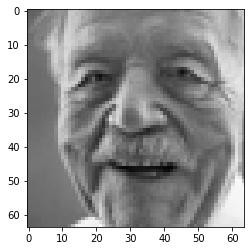

In [12]:
data = np.reshape(X[0], (Dimension, Dimension))
data = Image.fromarray(data)
imgg = plt.imshow(data)
plt.show(imgg)